# Module1_Lesson2
## Discretization

In [47]:
import numpy
from matplotlib import pyplot as plt
%matplotlib inline

In [48]:
T = 100.0  # Final time
dt = 0.01  # Time step
N = int(T / dt) + 1  # Number of time steps
t = numpy.linspace(0.0, T, num=N)  # Time grid

In [51]:
# Create timegrid using [numpy.arange]
T = 100.0 # Final time
dt = 0.01 # Time step
N = int(T/dt + 1) # Number of time steps
t = numpy.arange(0, T+dt, dt)# Time grid

In [52]:
# Set initial conditions
z0 = 100 # Initial altitude
zt = 100 # Trim altitude
b0 = 20 # Upward velocity
g = 9.81

b = numpy.zeros(N)
b[0] = b0
z = numpy.zeros(N)
z[0] = z0

## Euler' method

In [53]:
for i in range(1,N):
    z[i] = z[i-1] + dt * b[i-1]
    b[i] = b[i-1] + dt * g * (1 - z[i-1]/zt)

## Plot the solution

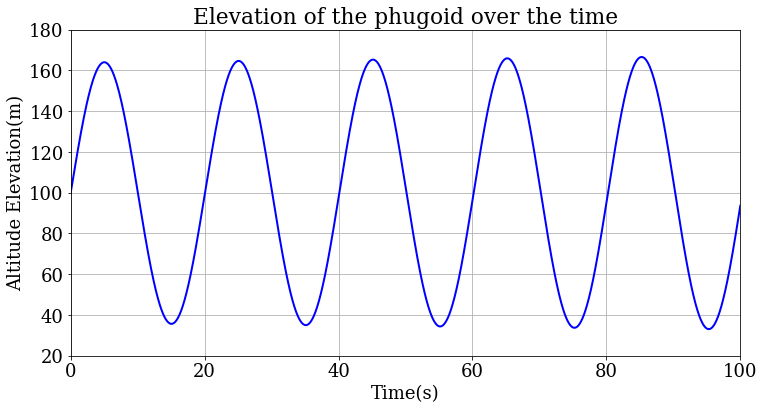

In [54]:
# Ploting
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 18

plt.figure(figsize=(12.0, 6.0))
plt.plot(t, z, color='b', linestyle='-', linewidth=2)
plt.title('Elevation of the phugoid over the time')
plt.xlabel('Time(s)')
plt.ylabel('Altitude Elevation(m)')
plt.xlim(t[0], t[-1])
plt.ylim(20,180)
plt.grid()

## Plot the exact solution

In [55]:
# copied from /home/numerical-mooc/lessons/01_phugoid/01_02_Phugoid_Oscillation.ipynb
z_exact = (b0 * (zt / g)**0.5 * numpy.sin((g / zt)**0.5 * t) +
           (z0 - zt) * numpy.cos((g / zt)**0.5 * t) + zt)

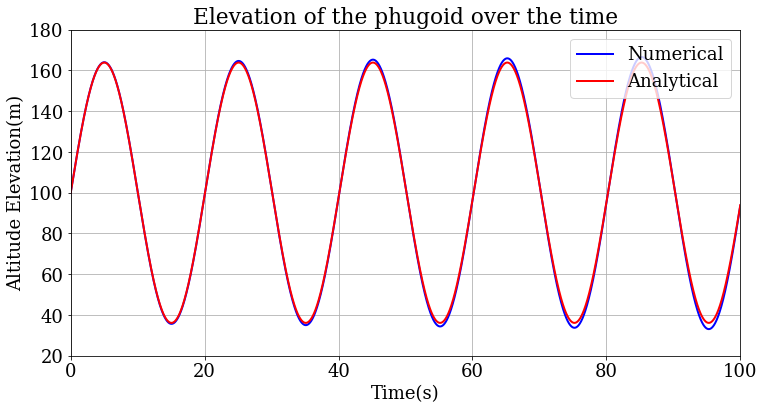

In [56]:
# Ploting numerical solution and exact solution
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 18

plt.figure(figsize=(12.0, 6.0))
plt.plot(t, z, label = 'Numerical', color='b', linestyle='-', linewidth=2)
plt.plot(t, z_exact, label = 'Analytical', color='r', linestyle='-', linewidth=2)
plt.title('Elevation of the phugoid over the time')
plt.xlabel('Time(s)')
plt.ylabel('Altitude Elevation(m)')
plt.xlim(t[0], t[-1])
plt.ylim(20,180)
plt.grid()
plt.legend(loc='upper right')

In [60]:
# copied from /home/numerical-mooc/lessons/01_phugoid/01_02_Phugoid_Oscillation.ipynb
# Set the list of time-step sizes.
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0001]

# Create an empty list that will contain the solution of each grid.
z_values = []

for dt in dt_values:
    N = int(T / dt) + 1  # number of time-steps
    t = numpy.arange(0.0, T+dt, dt)  # time grid
    # Set the initial conditions.
    b = numpy.zeros(N)
    b[0] = b0
    z = numpy.zeros(N)
    z[0] = z0
    # Temporal integration using Euler's method.
    for i in range(1, N):
        z[i] = z[i-1] + dt * b[i-1]
        b[i] = b[i-1] + dt * g * (1 - z[i-1]/zt)
    z_values.append(z)

In [61]:
# copied from /home/numerical-mooc/lessons/01_phugoid/01_02_Phugoid_Oscillation.ipynb
def l1_error(z, z_exact, dt):
    """
    Computes and returns the error
    (between the numerical and exact solutions)
    in the L1 norm.
    
    Parameters
    ----------
    z : numpy.ndarray
        The numerical solution as an array of floats.
    z_exact : numpy.ndarray
        The analytical solution as an array of floats.
    dt : float
        The time-step size.
        
    Returns
    -------
    error: float
        L1-norm of the error with respect to the exact solution.
    """
    error = dt * numpy.sum(numpy.abs(z - z_exact))
    return error

In [62]:
# copied from /home/numerical-mooc/lessons/01_phugoid/01_02_Phugoid_Oscillation.ipynb
# Create an empty list to store the errors on each time grid.
error_values = []

for z, dt in zip(z_values, dt_values):
    N = int(T / dt) + 1  # number of time-steps
    t = numpy.linspace(0.0, T, num=N)  # time grid
    # Compute the exact solution.
    z_exact = (b0 * (zt / g)**0.5 * numpy.sin((g / zt)**0.5 * t) +
               (z0 - zt) * numpy.cos((g / zt)**0.5 * t) + zt)
    # Calculate the L1-norm of the error for the present time grid.
    error_values.append(l1_error(z, z_exact, dt))


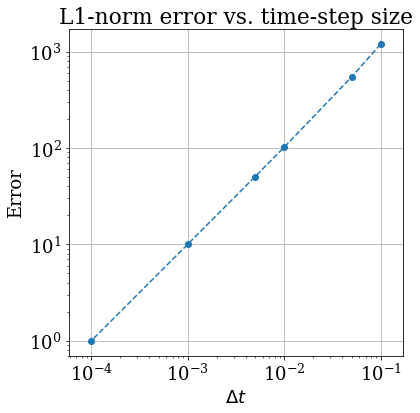

In [63]:
# copied from /home/numerical-mooc/lessons/01_phugoid/01_02_Phugoid_Oscillation.ipynb
# Plot the error versus the time-step size.
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('L1-norm error vs. time-step size')  # set the title
pyplot.xlabel('$\Delta t$')  # set the x-axis label
pyplot.ylabel('Error')  # set the y-axis label
pyplot.grid()
pyplot.loglog(dt_values, error_values,
              color='C0', linestyle='--', marker='o')  # log-log plot
pyplot.axis('equal');  # make axes scale equally

## Challenge

In [64]:
def error_cal(T, z0, b0, zt, dt):
    """
    Implements Euler's method and re-write the code cell that computes the solution for different time-step sizes
    
    Some of the codes copied from /home/numerical-mooc/lessons/01_phugoid/01_02_Phugoid_Oscillation.ipynb
    """
    import numpy
    N = int(T/dt) + 1 # Number of time steps
    t = numpy.arange(0, T+dt, dt)# Time grid
    g = 9.81
    b = numpy.zeros(N)
    b[0] = b0
    z = numpy.zeros(N)
    z[0] = z0
    for i in range(1,N):
        z[i] = z[i-1] + dt * b[i-1]
        b[i] = b[i-1] + dt * g * (1 - z[i-1]/zt)
    z_exact = (b0 * (zt / g)**0.5 * numpy.sin((g / zt)**0.5 * t) +
               (z0 - zt) * numpy.cos((g / zt)**0.5 * t) + zt)
    error = dt * numpy.sum(numpy.abs(z - z_exact))
    return error

### Test

In [68]:
T = 100.0
z0 = 100.0
zt = 100.0
b0 = 20.0
dt_test = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0001]
error_test = []
for dt in dt_test:
    error_test.append(error_cal(T, z0, b0, zt, dt))

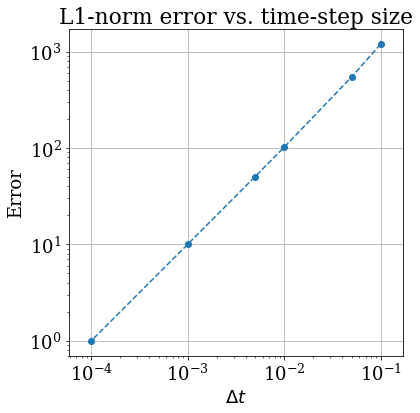

In [69]:
# copied from /home/numerical-mooc/lessons/01_phugoid/01_02_Phugoid_Oscillation.ipynb
# Plot the error versus the time-step size.
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('L1-norm error vs. time-step size')  # set the title
pyplot.xlabel('$\Delta t$')  # set the x-axis label
pyplot.ylabel('Error')  # set the y-axis label
pyplot.grid()
pyplot.loglog(dt_test, error_test,
              color='C0', linestyle='--', marker='o')  # log-log plot
pyplot.axis('equal');  # make axes scale equally